In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
from shapely.geometry import Point

In [11]:
df_house = pd.read_csv("df_RE_latlongs_v2.csv", index_col = 0)
df_biz = pd.read_csv("df_EssentialLatLong_v2.csv")
df_min_distances = pd.read_csv("df_min_distances.csv", index_col = 0)
df_shp = gpd.read_file("Ames_Precinct_Boundaries/Ames_-_Precincts_2.shp")

In [42]:
df_wm_house = gpd.GeoDataFrame(df_house.join(df_house.apply(lambda x: Point(x.Long, x.Lat), axis = 1).rename("geometry")), crs = "epsg:4326").to_crs(epsg = 3857)

In [27]:
df_wm = df_shp.to_crs(epsg = 3857)

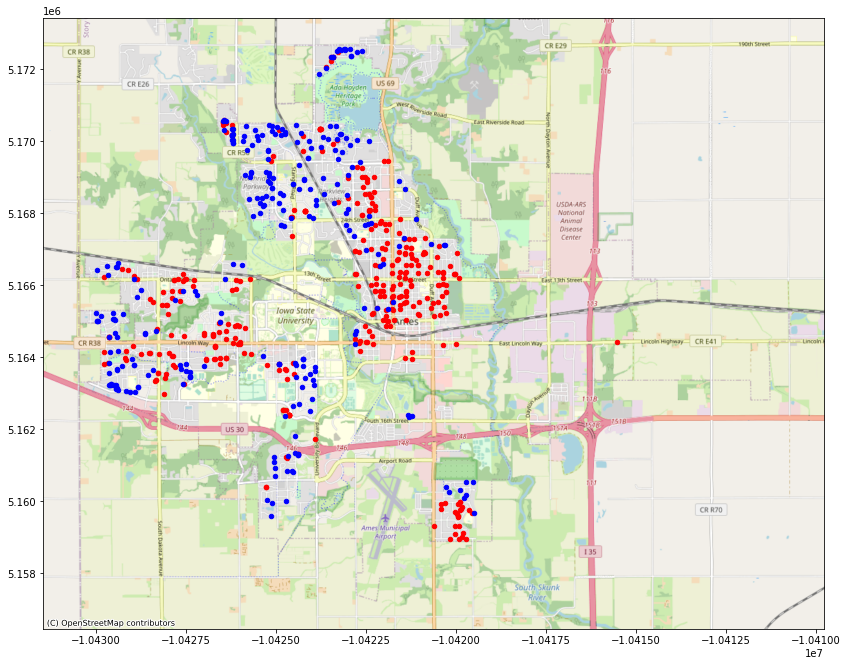

In [44]:
ax = df_wm.query("index > 0").plot(figsize = (14,14), alpha = 0)
df_wm_house.query("SalePrice <= SalePrice.mean()").plot(ax = ax, markersize = 20, color = "red", marker = "o")
df_wm_house.query("SalePrice > SalePrice.mean()").plot(ax = ax, markersize = 20, color = "blue", marker = "o")
cx.add_basemap(ax = ax, source = cx.providers.OpenStreetMap.Mapnik)
#df_shp.query("index >= 5").plot(ax = ax, figsize = (14,14), color = "red", edgecolor = "black")